## SVM

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
housing_price = pd.read_csv("kc_house_data.csv")

## 전처리
df_preprocessed = housing_price.drop(["id", "date", "price"], axis = 1)\
.assign(date = pd.to_datetime(housing_price.date)).assign(price = housing_price.price)

## scores recoding
scoring_dict = dict()

In [3]:
def month_days_split(df_train : pd.DataFrame, df_test : pd.DataFrame) :
    """
    train/test set에서 `date` 열을 월별과 일별로 따로 분석하기 위한 함수
    """
    test_month = df_test.date.dt.month.astype(str)
    test_days = df_test.date.map(lambda x : x - df_preprocessed.date.min()).dt.days
    train_month = df_train.date.dt.month.astype(str)
    train_days = df_train.date.map(lambda x : x - df_preprocessed.date.min()).dt.days
    
    return [train_month, train_days], [test_month, test_days]

df_train, df_test = train_test_split(df_preprocessed, test_size = 0.3, shuffle = True, random_state = 14107)
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

train_date, test_date = month_days_split(df_train, df_test)

In [18]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X, y)

SVC(C=1, gamma=1)

In [4]:
import matplotlib.pyplot as plt

/root/anaconda3/envs/skl/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/root/anaconda3/envs/skl/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/root/anaconda3/envs/skl/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


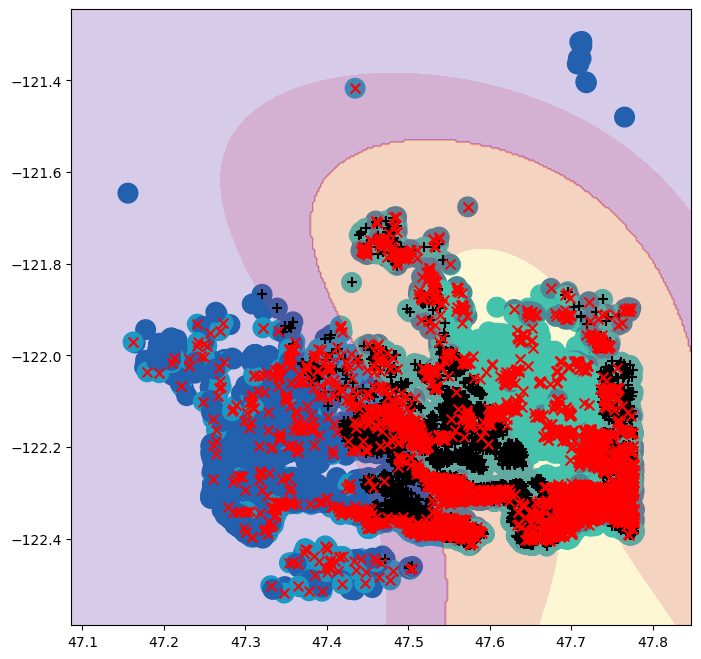

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X, y , svm_rbf , ax=ax)

In [21]:
kfold = KFold(5, random_state=0, shuffle=True)
grid = GridSearchCV(svm_rbf, {'C':[0.1,1,10,100,1000], 'gamma':[0.5,1,2,3,4]}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1000, 'gamma': 4}

In [ ]:
svm_rbf = SVC()
kfold = KFold(5, random_state=0, shuffle=True)

grid = GridSearchCV(svm_rbf, {'C': 10**np.linspace(2, 5, 4), 'gamma': 10**np.linspace(0, 3, 5)}, refit=True, cv=kfold, scoring='accuracy')
grid.fit(X, y)
grid.best_params_

In [43]:
best_svm = SVC(kernel="rbf", gamma=4, C=1000)
best_svm.fit(X, y)

SVC(C=1000, gamma=4)

In [53]:
models = [SVC(kernel='rbf', gamma = i, C = 1000) for i in [1, 10, 100, 1000]]
models = [clf.fit(X, y) for clf in models]

In [54]:
gammas = [1, 10, 100, 1000]

In [56]:
models

[SVC(C=1000, gamma=1),
 SVC(C=1000, gamma=10),
 SVC(C=1000, gamma=100),
 SVC(C=1000, gamma=1000)]

In [ ]:
fig, ax = plt.figure()

disp = DecisionBoundaryDisplay.from_estimator(
        best_svm,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax
)

ax.scatter(X.long, X.lat, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
ax.set_xlim([X.long.min(), X.long.max()])
ax.set_ylim([X.lat.min(), X.lat.max()])
ax.set_title(title)

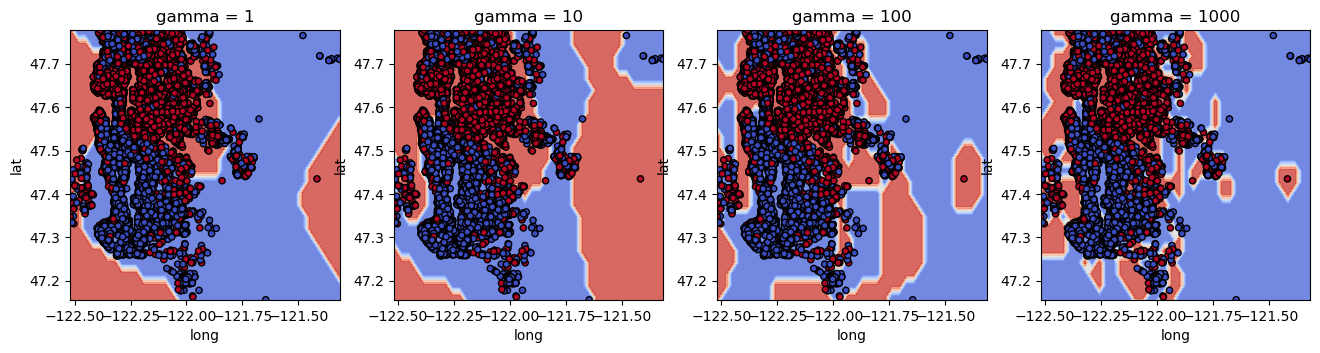

In [57]:
titles = [f"gamma = {i}" for i in gammas]

fig, axs = plt.subplots(1, 4, figsize = (16, 3.5))

for clf, title, ax in zip(models, titles, axs.flatten()) :
        disp = DecisionBoundaryDisplay.from_estimator(
                clf,
                X,
                response_method="predict",
                cmap=plt.cm.coolwarm,
                alpha=0.8,
                ax=ax
        )

        ax.scatter(X.long, X.lat, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = "k")
        ax.set_xlim([X.long.min(), X.long.max()])
        ax.set_ylim([X.lat.min(), X.lat.max()])
        ax.set_title(title)

In [24]:
best_svm = grid.best_estimator_
yyhat = best_svm.predict(XX)
confusion_table(yyhat, yy)

Truth,0,1
Predicted,,
0,2450,542
1,769,2723


In [6]:
## 반응변수 구간 분할
X = df_train[["long", "lat"]]
y = df_train.price.map(lambda x : x >= df_train.price.median()).astype(int)

XX = df_test[["long", "lat"]]
yy = df_test.price.map(lambda x : x >= df_train.price.median()).astype(int)

## hyperparameter tuning


## evaluation